# Practical Task

## Importing libraries and the dataset

In [461]:
# import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score, precision_score, recall_score, classification_report

In [462]:
# import the dataset
iris_df = pd.read_csv("Iris.csv", index_col=0)
iris_df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [463]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## What Data we have?
| Columns       |  Type                 |                           |   
| -------       |  -------------------- | --------------------------|
| SepalLengthCm | [Float][Continuous]   | Length of the sepal in cm |
| SepalWidthCm  | [Float][Continuous]   | Width of the sepal in cm  |
| PetalLengthCm | [Float][Continuous]   | Length of the petal in cm |
| PetalWidthCm  | [Float][Continuous]   | Width of the petal in cm  |
| Species       | [object][Categorical] | Species of the iris flower|

## Different between the independent variables and the dependent variable
From the Common Scence, the Independent variables (features):       
```
SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
```  

And dependent variable (target):  
```
Species
```

## Data exploration

In [464]:
# Generate descriptive statistics
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [465]:
# Group by Species
iris_df.groupby("Species").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


## Data Preprocessing

In [466]:

# Encode data, Iris-setosa: 1 , Not Iris-setosa: 0
iris_df["SpeciesIfSetosa"] = (iris_df["Species"] == "Iris-setosa").astype(int)
iris_df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesIfSetosa
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
6,5.4,3.9,1.7,0.4,Iris-setosa,1
7,4.6,3.4,1.4,0.3,Iris-setosa,1
8,5.0,3.4,1.5,0.2,Iris-setosa,1
9,4.4,2.9,1.4,0.2,Iris-setosa,1


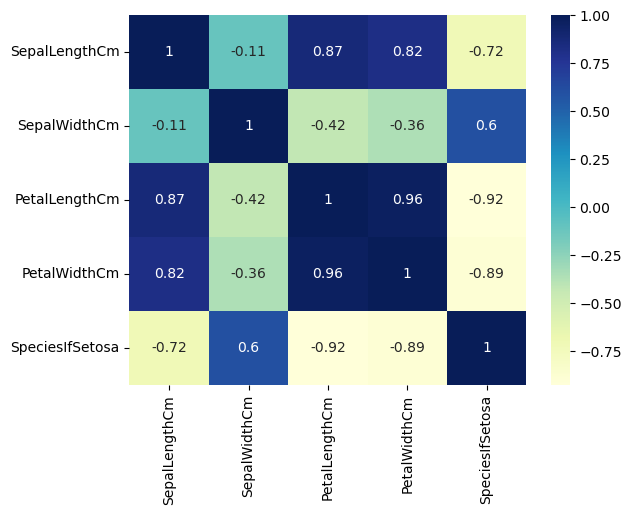

In [467]:
# Draw the heatmap
sns.heatmap(iris_df.drop("Species", axis=1).corr(), annot=True, cmap="YlGnBu")
plt.show()

In [468]:
X_features = iris_df.drop(["Species", "SpeciesIfSetosa"], axis=1)
y_target = iris_df["SpeciesIfSetosa"]

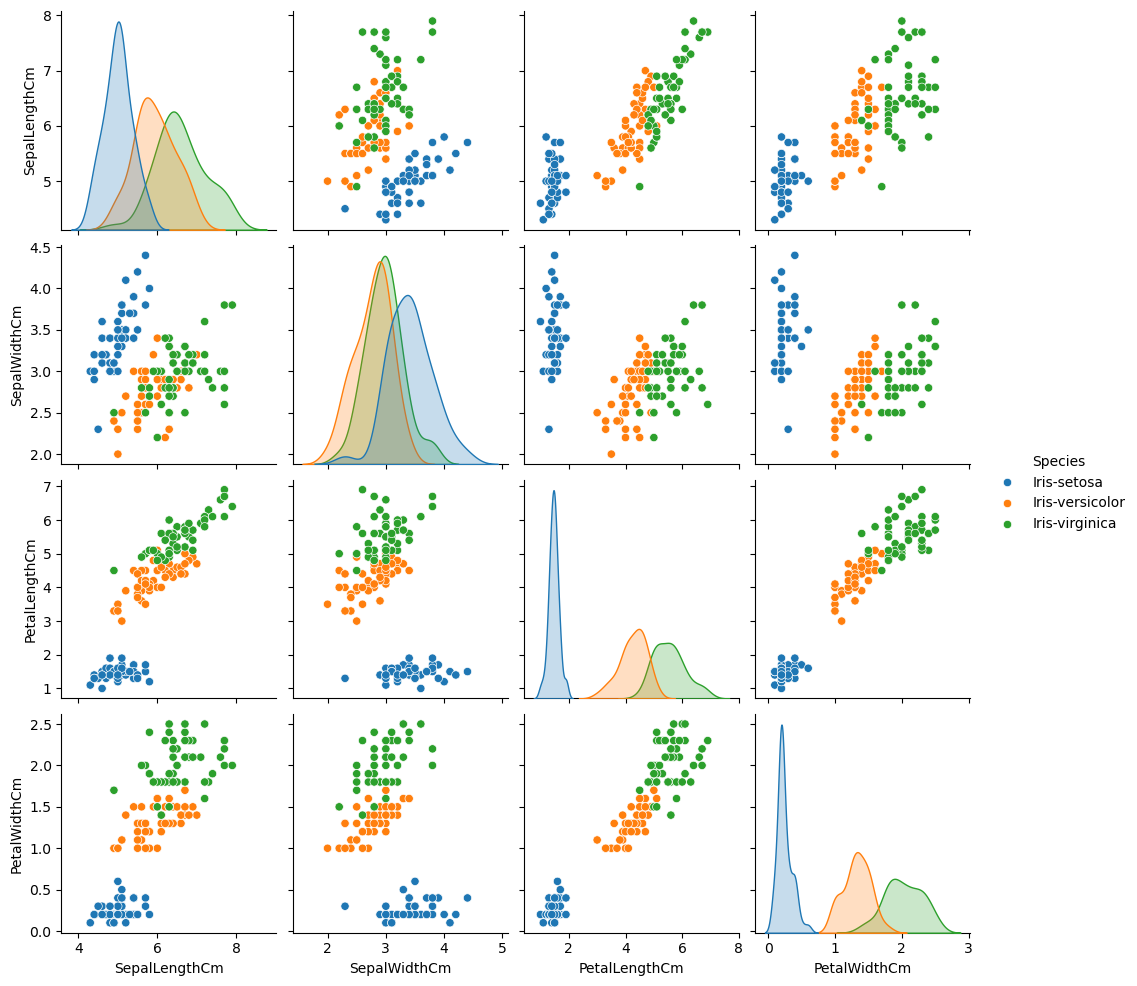

In [469]:
# Plot the distribution of the data
sns.pairplot(iris_df.drop(["SpeciesIfSetosa"], axis=1), hue="Species")

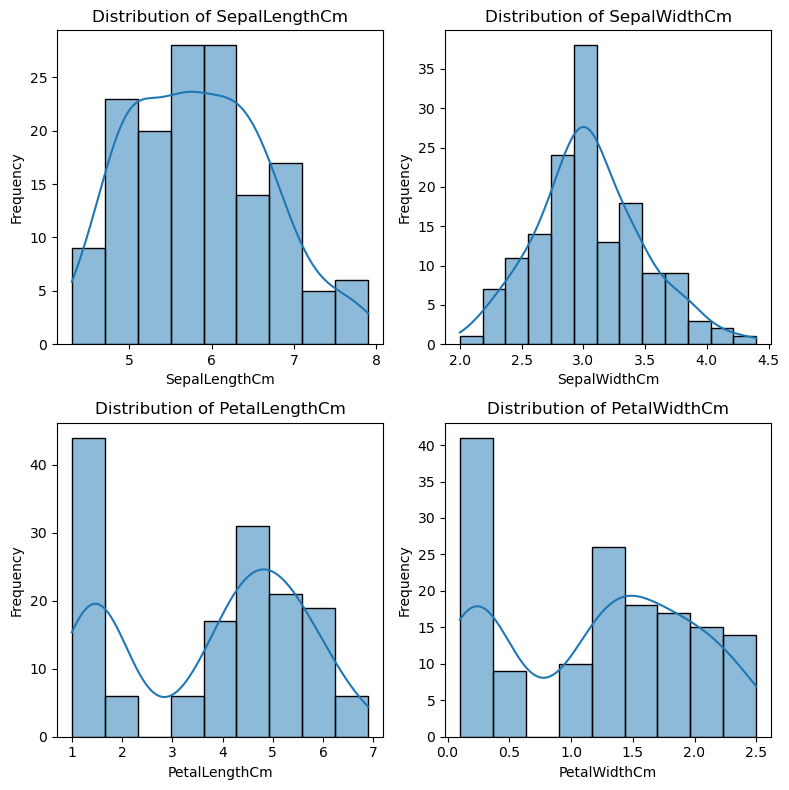

In [470]:
# Plot histogram distribution of features
figure, axs = plt.subplots(2, 2, figsize=(8,8))
axs = axs.flatten()
for i, col in enumerate(X_features.columns):
    sns.histplot(x=X_features[col], kde=True, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [471]:
# Split data into training and test sets
rseed = 23
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2,  random_state=rseed)

# Pint Training and Test data shapes
print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Training data: (120, 4) (120,)
Test data: (30, 4) (30,)


In [472]:
# Fit the scaler on train data
scaler_standard = StandardScaler()
scaler_normal = MinMaxScaler()

# Fit and transform the train data
features_standard = ["SepalLengthCm", "SepalWidthCm"]
features_normalize = ["PetalLengthCm", "PetalWidthCm"]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[features_standard] = scaler_standard.fit_transform(X_train[features_standard])
X_train_scaled[features_normalize] = scaler_normal.fit_transform(X_train[features_normalize])

# Transform the test data
X_test_scaled[features_standard] = scaler_standard.transform(X_test[features_standard])
X_test_scaled[features_normalize] = scaler_normal.transform(X_test[features_normalize])

## Implementing Logistic Regression model

In [473]:
# Fit a model
iris_model = LogisticRegression()
iris_model.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = iris_model.predict(X_test_scaled)

## Measuring Model Performance


### Confusion matrix

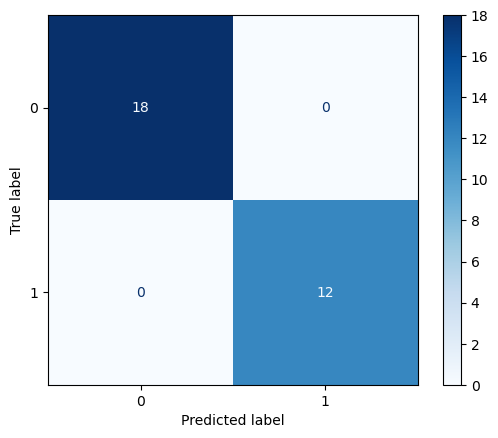

In [474]:
confusion_matrix_ndarray = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_ndarray)
confusion_matrix_display.plot(cmap="Blues")

### Accuracy

In [475]:
# Accuracy
score = iris_model.score(X_test_scaled, y_test)
print(f"Accuracy: {score*100:.1f}%")

Accuracy: 100.0%


### Average F1 Score

In [476]:
# Average F1 Score
score_f1 = f1_score(y_test, y_pred, average="micro")
print(f"Average F1 Score: {score_f1*100:.1f}%")

Average F1 Score: 100.0%


### Precision and Recall 

In [477]:
# Precision and Recall 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 1.0


### Report

In [478]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The model is certainly perfect.

## Make a prediction on new data

In [479]:
# Show the X_test data
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
140,6.9,3.1,5.4,2.1
126,7.2,3.2,6.0,1.8
68,5.8,2.7,4.1,1.0
4,4.6,3.1,1.5,0.2
114,5.7,2.5,5.0,2.0


In [480]:
# Show the X_test_scaled data
X_test_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
140,1.291282,0.157274,0.745763,0.833333
126,1.653888,0.381950,0.847458,0.708333
68,-0.038275,-0.741433,0.525424,0.375000
4,-1.488701,0.157274,0.084746,0.041667
114,-0.159144,-1.190786,0.677966,0.791667


In [481]:
# Assuming this new data
new_data = pd.DataFrame({"SepalLengthCm": [5.1], "SepalWidthCm": [3.5], "PetalLengthCm": [1.4], "PetalWidthCm": [0.3]})
new_data[features_standard] = scaler_standard.transform(new_data[features_standard])
new_data[features_normalize] = scaler_normal.transform(new_data[features_normalize])
print(new_data)

# Make a prediction
prediction = iris_model.predict(new_data)
print(f"Prediction: {prediction}")
print("Iris-setosa" if prediction == 1 else "Not Iris-setosa")

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.884357       1.05598       0.067797      0.083333
Prediction: [1]
Iris-setosa
